In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [46]:
csv_path = "1990-2019_annual_GENERATION_state.csv"

In [100]:
df = pd.read_csv(csv_path,header=None)
df = df.rename(columns=df.iloc[1])
df.columns
df = df[["YEAR","STATE","TYPE OF PRODUCER","ENERGY SOURCE","GENERATION (Megawatthours)"]]
df = df.drop(df.index[[0,1]])
df = df.reset_index()
df.nunique()

index                         53756
YEAR                             30
STATE                            54
TYPE OF PRODUCER                  6
ENERGY SOURCE                    14
GENERATION (Megawatthours)    43447
dtype: int64

In [131]:
clean = df[["YEAR", "ENERGY SOURCE", "GENERATION (Megawatthours)"]]
clean.set_index("YEAR")
cleaned = clean[clean["ENERGY SOURCE"] != "Total"]
cleaned["GENERATION (Megawatthours)"] = cleaned["GENERATION (Megawatthours)"].apply(lambda x: float(x.split()[0].replace(',', '')))
cleaned["ENERGY SOURCE"].unique()

<ipython-input-131-22f90dedf6e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["GENERATION (Megawatthours)"] = cleaned["GENERATION (Megawatthours)"].apply(lambda x: float(x.split()[0].replace(',', '')))


array(['Coal', 'Hydroelectric Conventional', 'Natural Gas', 'Petroleum',
       'Wind', 'Wood and Wood Derived Fuels', 'Nuclear', 'Other Biomass',
       'Other Gases', 'Pumped Storage', 'Geothermal', 'Other',
       'Solar Thermal and Photovoltaic'], dtype=object)

In [157]:
coal = cleaned[cleaned["ENERGY SOURCE"] == "Coal"][["YEAR","GENERATION (Megawatthours)"]]
fcoal = coal.groupby("YEAR").sum()
COAL = fcoal.rename(columns={"GENERATION (Megawatthours)": "COAL"})
GCOAL = COAL["COAL"]
GCOAL

YEAR
1990    6.376046e+09
1991    6.362491e+09
1992    6.484824e+09
1993    6.760281e+09
1994    6.762775e+09
1995    6.837706e+09
1996    7.180782e+09
1997    7.380063e+09
1998    7.494063e+09
1999    7.524349e+09
2000    7.865058e+09
2001    7.615824e+09
2002    7.732521e+09
2003    7.894947e+09
2004    7.913202e+09
2005    8.051492e+09
2006    7.962045e+09
2007    8.065822e+09
2008    7.943205e+09
2009    7.023617e+09
2010    7.389161e+09
2011    6.933720e+09
2012    6.056172e+09
2013    6.324459e+09
2014    6.326841e+09
2015    5.409593e+09
2016    4.956595e+09
2017    4.823341e+09
2018    4.597949e+09
2019    3.859827e+09
Name: COAL, dtype: float64

In [158]:
hec = cleaned[cleaned["ENERGY SOURCE"] == "Hydroelectric Conventional"][["YEAR", "GENERATION (Megawatthours)"]]
fhec = hec.groupby("YEAR").sum()
HEC = fhec.rename(columns={"GENERATION (Megawatthours)": "HYDROELECTRIC CONVENTIONAL"})
GHEC = HEC["HYDROELECTRIC CONVENTIONAL"]
GHEC

YEAR
1990    1.171463e+09
1991    1.155977e+09
1992    1.012352e+09
1993    1.121976e+09
1994    1.040503e+09
1995    1.243331e+09
1996    1.388648e+09
1997    1.425813e+09
1998    1.293343e+09
1999    1.278144e+09
2000    1.102290e+09
2001    8.678442e+08
2002    1.057315e+09
2003    1.103225e+09
2004    1.073669e+09
2005    1.081285e+09
2006    1.156986e+09
2007    9.900399e+08
2008    1.019326e+09
2009    1.093780e+09
2010    1.040812e+09
2011    1.277420e+09
2012    1.104961e+09
2013    1.074262e+09
2014    1.037466e+09
2015    9.963203e+08
2016    1.071249e+09
2017    1.201332e+09
2018    1.170096e+09
2019    1.151495e+09
Name: HYDROELECTRIC CONVENTIONAL, dtype: float64

In [160]:
ng = cleaned[cleaned["ENERGY SOURCE"] == "Natural Gas"][["YEAR", "GENERATION (Megawatthours)"]]
fng = ng.groupby("YEAR").sum()
NG = fng.rename(columns={"GENERATION (Megawatthours)": "NATURAL GAS"})
GNG = NG["NATURAL GAS"]
GNG

YEAR
1990    1.491061e+09
1991    1.526212e+09
1992    1.616298e+09
1993    1.659707e+09
1994    1.840875e+09
1995    1.984232e+09
1996    1.820222e+09
1997    1.917595e+09
1998    2.125028e+09
1999    2.225585e+09
2000    2.404153e+09
2001    2.556516e+09
2002    2.764023e+09
2003    2.599630e+09
2004    2.840400e+09
2005    3.043841e+09
2006    3.265763e+09
2007    3.586359e+09
2008    3.531922e+09
2009    3.683915e+09
2010    3.950789e+09
2011    4.054756e+09
2012    4.903577e+09
2013    4.499342e+09
2014    4.506436e+09
2015    5.333928e+09
2016    5.513228e+09
2017    5.185770e+09
2018    5.876531e+09
2019    6.342867e+09
Name: NATURAL GAS, dtype: float64

In [161]:
p = cleaned[cleaned["ENERGY SOURCE"] == "Petroleum"][["YEAR", "GENERATION (Megawatthours)"]]
fp = p.groupby("YEAR").sum()
P = fng.rename(columns={"GENERATION (Megawatthours)": "PETROLEUM"})
GP = P["PETROLEUM"]
GP

YEAR
1990    1.491061e+09
1991    1.526212e+09
1992    1.616298e+09
1993    1.659707e+09
1994    1.840875e+09
1995    1.984232e+09
1996    1.820222e+09
1997    1.917595e+09
1998    2.125028e+09
1999    2.225585e+09
2000    2.404153e+09
2001    2.556516e+09
2002    2.764023e+09
2003    2.599630e+09
2004    2.840400e+09
2005    3.043841e+09
2006    3.265763e+09
2007    3.586359e+09
2008    3.531922e+09
2009    3.683915e+09
2010    3.950789e+09
2011    4.054756e+09
2012    4.903577e+09
2013    4.499342e+09
2014    4.506436e+09
2015    5.333928e+09
2016    5.513228e+09
2017    5.185770e+09
2018    5.876531e+09
2019    6.342867e+09
Name: PETROLEUM, dtype: float64

In [162]:
w = cleaned[cleaned["ENERGY SOURCE"] == "Wind"][["YEAR", "GENERATION (Megawatthours)"]]
fw = w.groupby("YEAR").sum()
W = fw.rename(columns={"GENERATION (Megawatthours)": "WIND"})
GW = W["WIND"]
GW

YEAR
1990    1.115440e+07
1991    1.180380e+07
1992    1.155009e+07
1993    1.202331e+07
1994    1.378844e+07
1995    1.265701e+07
1996    1.293628e+07
1997    1.315214e+07
1998    1.210278e+07
1999    1.795199e+07
2000    2.237304e+07
2001    2.694933e+07
2002    4.141712e+07
2003    4.474987e+07
2004    5.657496e+07
2005    7.124220e+07
2006    1.063565e+08
2007    1.377997e+08
2008    2.214524e+08
2009    2.955445e+08
2010    3.786090e+08
2011    4.807064e+08
2012    5.632869e+08
2013    6.713590e+08
2014    7.266211e+08
2015    7.628742e+08
2016    9.079702e+08
2017    1.017211e+09
2018    1.090670e+09
2019    1.179625e+09
Name: WIND, dtype: float64

In [163]:
wwdf = cleaned[cleaned["ENERGY SOURCE"] == "Wood and Wood Derived Fuels"][["YEAR", "GENERATION (Megawatthours)"]]
fwwdf = wwdf.groupby("YEAR").sum()
WWDF = fwwdf.rename(columns={"GENERATION (Megawatthours)": "WOOD"})
GWWDF = WWDF["WOOD"]
GWWDF

YEAR
1990    130087558.0
1991    134901430.0
1992    146114652.0
1993    150493638.0
1994    151749456.0
1995    146084322.0
1996    147201248.0
1997    147793764.0
1998    145353530.0
1999    148162938.0
2000    150379466.0
2001    140799620.0
2002    154660156.0
2003    150116392.0
2004    152467535.0
2005    155425671.0
2006    155048386.0
2007    156056103.0
2008    149199418.0
2009    144200555.0
2010    148688637.0
2011    149796272.0
2012    151196515.0
2013    160110147.0
2014    169358901.0
2015    167714025.0
2016    163788910.0
2017    164494079.0
2018    163744636.0
2019    154173529.0
Name: WOOD, dtype: float64

In [164]:
n = cleaned[cleaned["ENERGY SOURCE"] == "Nuclear"][["YEAR", "GENERATION (Megawatthours)"]]
fn = n.groupby("YEAR").sum()
N = fn.rename(columns={"GENERATION (Megawatthours)": "NUCLEAR"})
GN = N["NUCLEAR"]
GN

YEAR
1990    2.307447e+09
1991    2.450260e+09
1992    2.475105e+09
1993    2.441165e+09
1994    2.561759e+09
1995    2.693608e+09
1996    2.698914e+09
1997    2.514577e+09
1998    2.694808e+09
1999    2.913016e+09
2000    3.015572e+09
2001    3.075305e+09
2002    3.120256e+09
2003    3.054931e+09
2004    3.154114e+09
2005    3.127945e+09
2006    3.148875e+09
2007    3.225699e+09
2008    3.224834e+09
2009    3.195418e+09
2010    3.227873e+09
2011    3.160817e+09
2012    3.077325e+09
2013    3.156066e+09
2014    3.188664e+09
2015    3.188712e+09
2016    3.222776e+09
2017    3.219799e+09
2018    3.228338e+09
2019    3.237637e+09
Name: NUCLEAR, dtype: float64

In [165]:
ob = cleaned[cleaned["ENERGY SOURCE"] == "Other Biomass"][["YEAR", "GENERATION (Megawatthours)"]]
fob = ob.groupby("YEAR").sum()
OB = fob.rename(columns={"GENERATION (Megawatthours)": "OTHER BIOMASS"})
GOB = OB["OTHER BIOMASS"]
GOB

YEAR
1990    53041506.0
1991    62658984.0
1992    71264132.0
1993    73332118.0
1994    76514388.0
1995    81619890.0
1996    83645358.0
1997    86836304.0
1998    89791750.0
1999    90288718.0
2000    92525260.0
2001    58192610.0
2002    60174855.0
2003    63247979.0
2004    61682284.0
2005    61681577.0
2006    64394098.0
2007    66098215.0
2008    70935041.0
2009    73770374.0
2010    75668822.0
2011    76887059.0
2012    79292147.0
2013    83321955.0
2014    86598876.0
2015    86813484.0
2016    87252927.0
2017    86439574.0
2018    83583054.0
2019    75854283.0
Name: OTHER BIOMASS, dtype: float64

In [166]:
og = cleaned[cleaned["ENERGY SOURCE"] == "Other Gases"][["YEAR", "GENERATION (Megawatthours)"]]
fog = og.groupby("YEAR").sum()
OG = fog.rename(columns={"GENERATION (Megawatthours)": "OTHER GASES"})
GOG = OG["OTHER GASES"]
GOG

YEAR
1990    41531316.0
1991    45342368.0
1992    53080942.0
1993    51823192.0
1994    53276200.0
1995    55479802.0
1996    57423250.0
1997    53402538.0
1998    53968916.0
1999    56502364.0
2000    55819028.0
2001    36157892.0
2002    45850741.0
2003    62400081.0
2004    61009724.0
2005    53856571.0
2006    56707235.0
2007    53813417.0
2008    46827503.0
2009    42528426.0
2010    45251148.0
2011    46264796.0
2012    47590337.0
2013    51411750.0
2014    48087144.0
2015    52466790.0
2016    51229722.0
2017    49875864.0
2018    53850993.0
2019    50364371.0
Name: OTHER GASES, dtype: float64

In [167]:
ps = cleaned[cleaned["ENERGY SOURCE"] == "Pumped Storage"][["YEAR", "GENERATION (Megawatthours)"]]
fps = ps.groupby("YEAR").sum()
PS = fps.rename(columns={"GENERATION (Megawatthours)": "PUMPED STORAGE"})
PS = PS.abs()
GPS = PS["PUMPED STORAGE"]
GPS

YEAR
1990    14030964.0
1991    18165740.0
1992    16706328.0
1993    16142288.0
1994    13511300.0
1995    10900524.0
1996    12352312.0
1997    16159620.0
1998    17869120.0
1999    24387596.0
2000    22155440.0
2001    35293780.0
2002    34971712.0
2003    34140260.0
2004    33952840.0
2005    26231152.0
2006    26231368.0
2007    27585408.0
2008    25152248.0
2009    18509380.0
2010    22004528.0
2011    25682064.0
2012    19801984.0
2013    18724132.0
2014    24694192.0
2015    20365952.0
2016    26744508.0
2017    25978192.0
2018    23618156.0
2019    21042976.0
Name: PUMPED STORAGE, dtype: float64

In [168]:
gt = cleaned[cleaned["ENERGY SOURCE"] == "Geothermal"][["YEAR", "GENERATION (Megawatthours)"]]
fgt = gt.groupby("YEAR").sum()
GT = fgt.rename(columns={"GENERATION (Megawatthours)": "GEOTHERMAL"})
GGT = GT["GEOTHERMAL"]
GGT

YEAR
1990    61737084.0
1991    63865778.0
1992    64551848.0
1993    67154260.0
1994    62141814.0
1995    53513032.0
1996    57314736.0
1997    58904408.0
1998    59095672.0
1999    59308054.0
2000    56372632.0
2001    54962004.0
2002    57965240.0
2003    57696924.0
2004    59243898.0
2005    58766980.0
2006    58272116.0
2007    58548852.0
2008    59359908.0
2009    60034632.0
2010    60876852.0
2011    61264272.0
2012    62249704.0
2013    63098696.0
2014    63507764.0
2015    63670300.0
2016    63303228.0
2017    63707096.0
2018    63868536.0
2019    61890868.0
Name: GEOTHERMAL, dtype: float64

In [169]:
o = cleaned[cleaned["ENERGY SOURCE"] == "Other"][["YEAR", "GENERATION (Megawatthours)"]]
fo = o.groupby("YEAR").sum()
O = fo.rename(columns={"GENERATION (Megawatthours)": "OTHER"})
GO = O["OTHER"]
GO

YEAR
1990    14462650.0
1991    18955396.0
1992    14879552.0
1993    13948624.0
1994    14667702.0
1995    16415232.0
1996    14285118.0
1997    14447956.0
1998    14285640.0
1999    16095094.0
2000    19175656.0
2001    47625371.0
2002    54107643.0
2003    56178025.0
2004    56929605.0
2005    51284235.0
2006    51897598.0
2007    48924523.0
2008    47214662.0
2009    47713337.0
2010    51421365.0
2011    56614401.0
2012    55148267.0
2013    54350096.0
2014    53845176.0
2015    56111225.0
2016    55016941.0
2017    52384473.0
2018    51892817.0
2019    53337045.0
Name: OTHER, dtype: float64

In [171]:
stp = cleaned[cleaned["ENERGY SOURCE"] == "Solar Thermal and Photovoltaic"][["YEAR", "GENERATION (Megawatthours)"]]
fstp = stp.groupby("YEAR").sum()
STP = fstp.rename(columns={"GENERATION (Megawatthours)": "SOLAR THERMAL AND PHOTOVOLTAIC"})
GSTP = STP["SOLAR THERMAL AND PHOTOVOLTAIC"]
GSTP

YEAR
1990      1468348.0
1991      1887060.0
1992      1598560.0
1993      1849808.0
1994      1946488.0
1995      1987284.0
1996      2084820.0
1997      2044672.0
1998      2009892.0
1999      1980328.0
2000      1973500.0
2001      2171020.0
2002      2219324.0
2003      2136004.0
2004      2300620.0
2005      2201176.0
2006      2030824.0
2007      2447172.0
2008      3457260.0
2009      3564719.0
2010      4848727.0
2011      7270783.0
2012     17306702.0
2013     36142481.0
2014     70764123.0
2015     99571613.0
2016    144216487.0
2017    213147464.0
2018    255301263.0
2019    287747288.0
Name: SOLAR THERMAL AND PHOTOVOLTAIC, dtype: float64

In [179]:
finaldf = pd.DataFrame({"COAL": GCOAL, "HYDROELECTRIC CONVENTIONAL":GHEC, "NATURAL GAS": GNG, "PETROLEUM": GP, "WIND": GW, "WOOD": GWWDF, "NUCLEAR":GN, "OTHER BIOMASS": GOB, "OTHER GASES": GOG, "PUMPED STORAGE": GPS, "GEOTHERMAL": GGT, "OTHER": GO, "SOLAR THERMAL AND PHOTOVOLTAIC": GSTP})
finaldf

,COAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,PETROLEUM,WIND,WOOD,NUCLEAR,OTHER BIOMASS,OTHER GASES,PUMPED STORAGE,GEOTHERMAL,OTHER,SOLAR THERMAL AND PHOTOVOLTAIC
YEAR,,,,,,,,,,,,,
1990,6.376046e+09,1.171463e+09,1.491061e+09,1.491061e+09,1.115440e+07,130087558.0,2.307447e+09,53041506.0,41531316.0,14030964.0,61737084.0,14462650.0,1468348.0
1991,6.362491e+09,1.155977e+09,1.526212e+09,1.526212e+09,1.180380e+07,134901430.0,2.450260e+09,62658984.0,45342368.0,18165740.0,63865778.0,18955396.0,1887060.0
1992,6.484824e+09,1.012352e+09,1.616298e+09,1.616298e+09,1.155009e+07,146114652.0,2.475105e+09,71264132.0,53080942.0,16706328.0,64551848.0,14879552.0,1598560.0
1993,6.760281e+09,1.121976e+09,1.659707e+09,1.659707e+09,1.202331e+07,150493638.0,2.441165e+09,73332118.0,51823192.0,16142288.0,67154260.0,13948624.0,1849808.0
1994,6.762775e+09,1.040503e+09,1.840875e+09,1.840875e+09,1.378844e+07,151749456.0,2.561759e+09,76514388.0,53276200.0,13511300.0,62141814.0,14667702.0,1946488.0
1995,6.837706e+09,1.243331e+09,1.984232e+09,1.984232e+09,1.265701e+07,146084322.0,2.693608e+09,81619890.0,55479802.0,10900524.0,53513032.0,16415232.0,1987284.0
1996,7.180782e+09,1.388648e+09,1.820222e+09,1.820222e+09,1.293628e+07,147201248.0,2.698914e+09,83645358.0,57423250.0,12352312.0,57314736.0,14285118.0,2084820.0
1997,7.380063e+09,1.425813e+09,1.917595e+09,1.917595e+09,1.315214e+07,147793764.0,2.514577e+09,86836304.0,53402538.0,16159620.0,58904408.0,14447956.0,2044672.0
1998,7.494063e+09,1.293343e+09,2.125028e+09,2.125028e+09,1.210278e+07,145353530.0,2.694808e+09,89791750.0,53968916.0,17869120.0,59095672.0,14285640.0,2009892.0


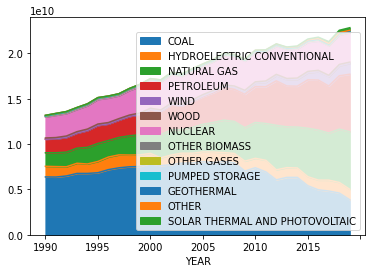

In [180]:
finaldf.plot.area()